### Microtubule Simulator

Show how to build and save informations of **ONE** microtubule.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import sys
sys.path.append("../")

import anamic

import numpy as np
import matplotlib.pyplot as plt

In [4]:
n_pf = 11
mt_length_nm = 2000  # nm
taper_length_nm = 200  # nm

dimers = anamic.simulator.dimers_builder(n_pf, mt_length_nm, taper_length_nm)

# Set parameters for the image generation.
parameters = {}
parameters['labeling_ratio'] = 0.1  # from 0 to 1

parameters['pixel_size'] = 110  # nm/pixel
parameters['x_offset'] = 1500  # nm
parameters['y_offset'] = 1500  # nm

parameters['psf_size'] = 135  # nm

parameters['signal_mean'] = 700
parameters['signal_std'] = 100
parameters['bg_mean'] = 500
parameters['bg_std'] = 24
parameters['noise_factor'] = 1

parameters['snr_line_width'] = 3  # pixel

ms = anamic.simulator.MicrotubuleSimulator(dimers)
ms.parameters.update(parameters)

# Build the geometry.
ms.build_positions(apply_random_z_rotation=True, show_progress=True)
ms.label()
ms.project()
ms.random_rotation_projected()

# Generate the image
ms.discretize_position()
ms.convolve()

snr = ms.calculate_snr()
print(f"SNR is {snr:.02f}")

# Save image, parameters and dimer positions.
#ms.save_positions("/home/hadim/test.csv")
#ms.save_metadata("/home/hadim/md.json")
#ms.save_image("/home/hadim/md.tif")


SNR is 2.10


In [5]:
# Show 3D position
_ = ms.show_positions(size=6, color_feature_name='pf', backend='ipv')

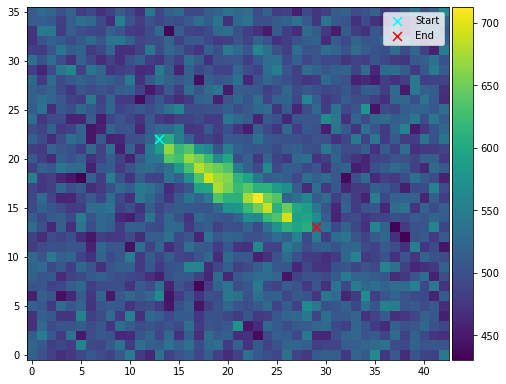

In [6]:
# Show final generated image
ms.show_image(tip_marker_size=80)

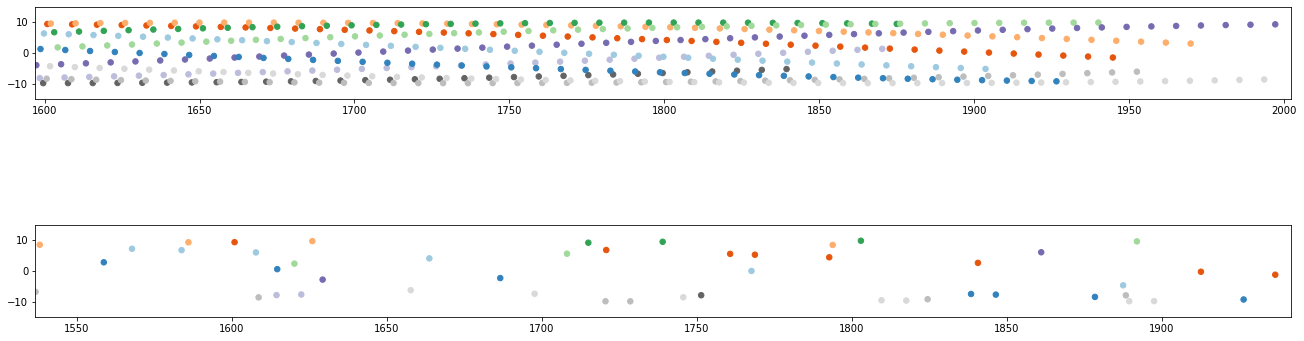

In [7]:
# Show projected 2D positions
_ = ms.visualize_2d_positions('x_proj', 'y_proj', show_all=True, show_labeled=True,
                              color_feature='pf', marker_size=30, x_offset=400)

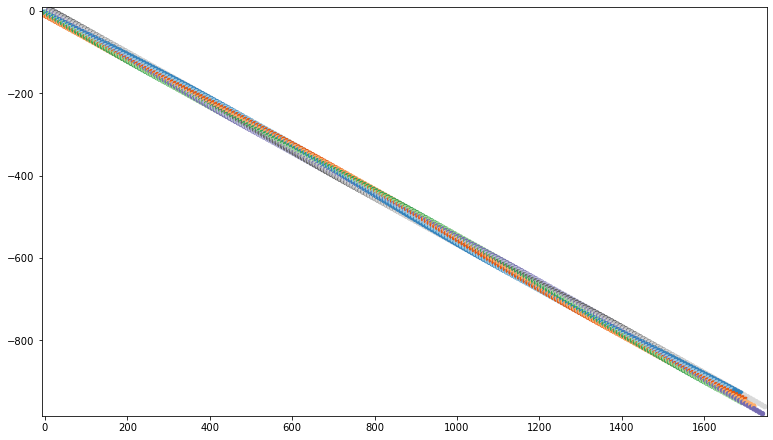

In [8]:
# Show projected 2D positions after rotation
_ = ms.visualize_2d_positions('y_proj_rotated', 'x_proj_rotated', show_all=True, show_labeled=False,
                              color_feature='pf', marker_size=20, x_offset=0)